In [39]:
# common packages 
import numpy as np 
import os
import struct

from math import *
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}

matplotlib.rc('font', **font)

# ipywidgets for some interactive features
from ipywidgets.widgets import * 
import ipywidgets as widgets

#Hugo code
import Utility
import PythonKEX

In [2]:
# load data
print(PythonKEX.define_KEX_dataset.__doc__)
LM_paths, sino_paths, phantom_str, recon_paths = PythonKEX.define_KEX_dataset(isKanyl=True)

 return list mode paths, sinograms paths, phantom title (Cannula or Cylinder ), and paths to reconstructions 


In [3]:
#load data
gate = 0
LMs = []
for path in LM_paths:
    with open(path, 'rb') as file:
        LMs.append(np.fromfile(file, dtype=np.uint32))

In [4]:
#histograms
histograms = []
for L in LMs:
    
    timeSlice = Utility.timeSlices(L, timeTagsPerSlice=1000)[0]
    for k in range(10):
        print("{0:b}".format(timeSlice[k]))
    events = Utility.events(timeSlice)
    bin_addresses = events & 0X3FFFFFFF
    histo = np.zeros(np.prod(Utility.HISTOGRAM_SHAPE), dtype=np.ushort)
    np.add.at(histo, bin_addresses,1)
    histograms.append(histo)

1001011010010101010101000110001
1000011110100011110001001101101
1011000011111000011010000011100
1000100111011000010101111101100
1000001010101000100011111001101
1000111010010000100110000110111
1000101100101001101011110111111
1000100110000001100110011101101
1001010111011100111010110001011
1000000111111011011101110100001
1011001011111011001110100001101
1000100001011110000011110111100
1010101011111010100010111010011
1000001010001101010001111000110
1000110010100110111001100101100
1000100100110011011011011010101
1010000100010110000011010000111
1010000110111001110111100110001
1001000110001010111110010100110
1001110010010101000101011000110


In [5]:
print(np.sum(histograms[0]))

634955


In [6]:

histograms4D = []
for histo in histograms:
    histograms4D.append(np.reshape(histograms[0], newshape=Utility.HISTOGRAM_SHAPE))

In [7]:
#com = Utility.CenterOfMassMultiplication(histograms4D[0])
#print(com)

C:\Users\petct\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


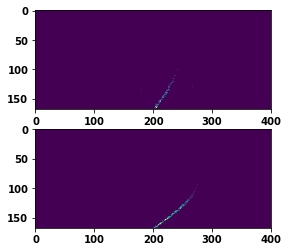

In [8]:
# look at histograms
#look at histogram
tof=5
mi = 47

for k, histo in enumerate(histograms):
    plt.subplot(2, 1, k+1)
    histo4D = np.reshape(histo, Utility.HISTOGRAM_SHAPE)
    plt.imshow(histo4D[tof, mi])

In [9]:
Utility.interactHistograms(histograms=histograms4D)

interactive(children=(IntSlider(value=2, description='vert. axis', max=3), IntSlider(value=3, description='hor…

In [10]:
def interactHistograms(histograms, titles=None, subplotShape=None, figsize=None):
    """ assumes a sequence of 4D histograms [tof, mi, tx, ro] """
    #determine view
    #slice dimension 1
    #slice dimension 2
    dimensions = np.arange(4)
    horizontalWidget = widgets.IntSlider(min=0,max=4-1, value=0,
                                         description='horiz. axis')
    verticalWidget = widgets.IntSlider(min=0, max=4-1, value=1, description = 'vert. axis')
    #check difference with an if statement
    
    #determine position on fixed dimensions
    # for example mi, tof
    
    positionWidgetA = widgets.IntSlider(min=0)
    positionWidgetB = widgets.IntSlider(min=0)
    
    #update
    def fixedDimensions(horiz, vert):
        dimensions = np.arange(4)
        #print("bFixed2D", [dimensions != horiz, dimensions != vert])
        #print("bFixed", np.all([dimensions != horiz, dimensions != vert], axis=0))
        bFixedDims = np.all([dimensions != horiz, dimensions != vert], axis=0)
        fixedDims = dimensions[bFixedDims]
        return fixedDims
    
    def updatePositionWidgets(*args):
        fixedDims = fixedDimensions(verticalWidget.value, horizontalWidget.value)
        for k, widg in enumerate([positionWidgetA, positionWidgetB]):
            dim = fixedDims[k]
            widg.max = Utility.HISTOGRAM_SHAPE[dim] -1
            widg.description = Utility.DIM_TITLES[dim]
            
    for widg in [verticalWidget, horizontalWidget]:
        widg.observe(updatePositionWidgets, 'value')
    
    def f(vDim, hDim, posA,posB):
        if vDim != hDim:
            fixedDims =fixedDimensions(vDim, hDim)
            #print(fixedDims)
            Utility.viewNDImages(images=histograms, fixedDimensions=fixedDims, fixedValues=[posA, posB],
                                subplotShape=subplotShape, titles = titles,
                                axisLabels=[Utility.DIM_TITLES[hDim],Utility.DIM_TITLES[vDim]],
                                            figsize=figsize)
        else: 
            print("warning: non-distinct vertical and horizontal axes")
    
    interact(f, vDim=verticalWidget, hDim=horizontalWidget, posA=positionWidgetA, posB=positionWidgetB);

In [11]:
# save histograms
for k, path in enumerate(sino_paths):
    with open(path, 'wb') as f:
        #fast
        f.write(histograms[k])

In [12]:
print(sino_paths)

['C:/Users/petct/Desktop/KanylPET-Converted/KanylPET-LM-00/KanylPET-LM-00-sino-0.s', 'C:/Users/petct/Desktop/KanylPET-Converted/KanylPET-LM-01/KanylPET-LM-01-sino-0.s']


In [13]:
#load recons
recons = []
for path in recon_paths:
    PETscans = Utility.load_scan(path)
    Pixels = Utility.get_pixels_hu(PETscans)
    recons.append(Pixels)

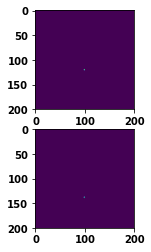

In [14]:
#look at recons
plt.figure()
z = 47
for k in range(2):
    plt.subplot(2, 1, k+1)
    plt.imshow(recons[k][z])

plt.show()

In [15]:
def offsetMap(size):
    """ the size has to be an odd number"""
    offsets = np.zeros((size,), dtype=int)
    for k in range(0, size // 2):
        offsets[2*k+1] = (k+1)
        offsets[2*k+2] = -(k+1)
    return offsets

In [16]:
#scanner parameters
segment_table = np.array([109,97,97,75,75,53,53,31,31], dtype=int)
tof_offset_map = offsetMap(13)
segment_offset_map = offsetMap(9)
axial_compression = 11
number_of_views = 168
number_of_projections = 400
number_of_sinograms = sum(segment_table)
sinogram_size = number_of_projections*number_of_views
michelogram_size = sinogram_size*number_of_sinograms
print(segment_table)
print(tof_offset_map[13 % 13])

[109  97  97  75  75  53  53  31  31]
0


In [17]:
#calculate "function" from michelogram index to segment and axial offset
segment_offset_map = np.zeros((number_of_sinograms,), dtype=np.int)
axial_offset_map = np.zeros((number_of_sinograms,), dtype=np.int)
m = 0
for s in range(0,len(segment_table)):
    segment_offset_map[m:m+segment_table[s]] = s
    axial_offset_map[m:m+segment_table[s]] = np.arange(0,segment_table[s], 1) + (segment_table[0] - segment_table[s])//2
    m += segment_table[s]
#print("segment index map\n", segment_offset_map)

#print("axial offset map\n", axial_offset_map)

In [18]:
#a faster way
def CenterOfMassMultiplication(arr):
    """calculate Center of mass of numpy array with array multiplication using array coordinates. """
    #calculate 1-D representations of grid

    arr64 = np.array(arr, dtype=np.int64)
    counts = np.sum(arr64)
    coordinates = np.zeros(shape=(len(arr64.shape),), dtype=np.int64)
    for k in range(0,len(arr64.shape)): 
        temp = np.arange(0,arr64.shape[k],1)
        temp_shape = np.ones(len(arr64.shape), dtype=np.int64)
        temp_shape[k] = len(temp)
        temp_shape = tuple(temp_shape)
        temp = np.reshape(temp, tuple(temp_shape))
        temp = arr64*temp
        temp = np.sum(temp)
        coordinates[k]=temp
    return coordinates, counts

In [19]:
#thank you GeeksforGeeks
def bitExtracted(number, k, p): 
    """ extract k bits towards most significant bit, starting at p bits away from least significant bit (where p=1) """
    # k 1's: 111111...111 AND the number starting at bit index (p-1) [0 indexing]
    return ( ((1 << k) - 1)  &  (number >> (p-1) ) );

In [20]:
# test bitExtracted
number = 171
k = 3
p = 3
print ("The extracted number is ", bitExtracted(number, k, p) )
print("input number binary: ", "{0:b}".format(number))
print("output number binary", "{0:b}".format(bitExtracted(number, k, p)))
print("{0:b}".format((1 << 6)-1))
print("{0:b}".format(number >> (p)))

The extracted number is  2
input number binary:  10101011
output number binary 10
111111
10101


In [21]:
#Thank you Siemens 4 ring mCT walkthrough
def binAddresToProjectionSpace(event):
    """ extract [ro,tx,mi,tof] bin using formula: event = 1*ro+200+c1*tx+c1*c2*mi+c1*c2*c3*tof + prompt + tag"""
    # tag = bitExtracted(event,1,32)
    #prompt_bit = bitExtracted(event,1,31)
    event = np.array(event)
    bin_address_remains = event & 0X3FFFFFFF
    coefficients = [michelogram_size, sinogram_size, number_of_projections, 1 ]
    coordinates = np.zeros((len(coefficients),np.size(event)), dtype=int)
    for k in range(0, len(coefficients)):
        coeff = coefficients[k]
        coordinates[k] = bin_address_remains // coeff
        bin_address_remains -= coordinates[k]*coeff
    coordinates[-1] -= number_of_projections // 2 #reintroduce negative range
    coordinates = np.flip(coordinates, axis=0)
    coordinates = np.squeeze(coordinates)
    return coordinates

In [22]:
#test binAddresToProjectionSpace
ro= 2
tx = 3
mi = 5
tof = 7
event = ro*1+200 + tx*number_of_projections + mi*sinogram_size+tof*michelogram_size
coordinates = binAddresToProjectionSpace(event)
print("difference", np.array([ro,tx,mi,tof])-np.array(coordinates))

#test array compatibility
events = [event, event+1000]
coordinates = binAddresToProjectionSpace(events)
print("coordinates of 2 events\n", coordinates)

difference [0 0 0 0]
coordinates of 2 events
 [[   2 -198]
 [   3    6]
 [   5    5]
 [   7    7]]


In [23]:
def projectionSpaceToBinAddres(coordinates):
    """ convert coordinates [ro, tx, mi, tof] to 1D bin address"""
    temp = np.multiply(coordinates, [1,
                                        number_of_projections, 
                                        sinogram_size, 
                                        michelogram_size])
    s = np.sum(temp)
    return int(s + number_of_projections//2)

In [24]:
#test projectionSpaceToBinAddresabs
ew = int(23)
print(ew)
coords = binAddresToProjectionSpace(ew)
print(coords)
result = projectionSpaceToBinAddres(coords)
print(result)
print("difference", ew - result)

23
[-177    0    0    0]
23
difference 0


In [25]:
def isEvent(event):
    tag = (event >> 31) & 1
    if (tag == 0): #event tag
        return True
        # prompt_bit = (event >> 30) & 1
        # if (prompt_bit== 0): #delayed
        # else: # coincidence
    else: #packet
        #if (((event >> 28) & 0Xe) == 8): #elapsed time tag 
        #if (( event >> 24 & 0XFF) == 0XC4): #horizontal bed position 
        #if ((event >> 24 & 0XFC) == 0XBC): #lost event tally
        return False

In [26]:
def get2DMichelogramIndex(michelogram_index):
    """ converts 1D michelogram index to segment number (tilt) and axial offset (halfplanes)"""
    #mi / seg_table[0]
    # 55 + 55 -1 
    segment_bins = np.cumsum(segment_table)
    segment_number = np.searchsorted(segment_bins, michelogram_index+1, side='left', sorter=None)
    
    
    if segment_number == 0:
        axial_offset = michelogram_index 
    else:
        segment_index = michelogram_index - segment_bins[segment_number-1]
        axial_offset = segment_index + (segment_table[0] - segment_table[segment_number])//2 
    
    return segment_number, axial_offset

In [27]:
#test get2DMichelogramIndex
print("michelogram index, segment")
seg = -1
for k in range(0,sum(segment_table)):
    temp, _ = get2DMichelogramIndex(k)
    if (temp > seg):
        seg = temp
        print(k, seg)

michelogram index, segment
0 0
109 1
206 2
303 3
378 4
453 5
506 6
559 7
590 8


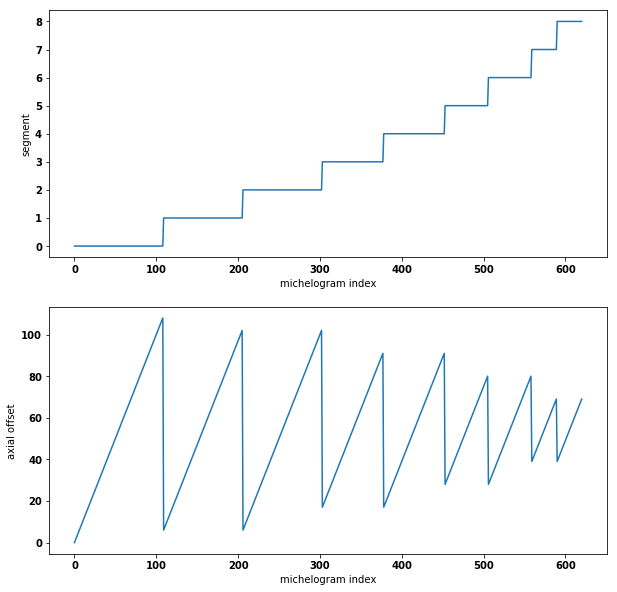

In [28]:
#test get2DMichelogramIndex
axial_offset = []
segment = []
x = []
for k in range(0,sum(segment_table)):
    seg, ao = get2DMichelogramIndex(k)
    segment.append(seg)
    axial_offset.append(ao)
    x.append(k)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(x,segment)
plt.ylabel("segment")
plt.xlabel("michelogram index")
plt.subplot(2,1,2)
plt.plot(x,axial_offset)
plt.ylabel("axial offset")
plt.xlabel("michelogram index")
plt.show()

In [29]:
#compare get2DMichelogramIndex with precalculated functions
inconsistency_count = 0
for k in range(0, number_of_sinograms):
    seg, ao = get2DMichelogramIndex(k)
    if (seg != segment_offset_map[k]):
        print("segment inconsistencies at mi ", k)
        inconsistency_count +=1
    if (ao != axial_offset_map[k]):
        print("axial offset inconsistencies at mi ", k)
        inconsistency_count +=1
print("number of inconsistencies:", inconsistency_count)

number of inconsistencies: 0


In [30]:
#data paths
Kanyl = True
if Kanyl:
    input_path = r"C:/Users/petct/Desktop/KanylPET-Converted/KanylPET-LM-00/KanylPET-LM-00.l"
    output_path = r"C:\Users\petct\Desktop\Hugo\Code\KEX_LM\PythonCopies\KanylPET-LM-00-copy.l"
else:
    input_path = r"C:/Users/petct/Desktop/CylinderPET-Converted/CylinderPET-LM-00/CylinderPET-LM-00.l"
    output_path = r"C:\Users\petct\Desktop\Hugo\Code\KEX_LM\PythonCopies\CylinderPET-LM-00-copy.l"

In [31]:
#read
with open(input_path, 'rb') as file:
    input_data = np.fromfile(file, dtype=np.uint32)

In [32]:
#write copy
with open(output_path, 'wb') as f:
    #fast
    f.write(input_data)
    #slow alternative
    #for event in input_data:
        #f.write(struct.pack('=I', event))

In [33]:
#extract event data
event_data = input_data[((input_data >> 31) & 1) == 0]
print("length of input data is", len(input_data))
print("length of event data is", len(event_data))
delayed_data = event_data[((event_data >> 30) & 1) == 0]
print("number of delays is    ", len(delayed_data))

length of input data is 37971248
length of event data is 37908612
number of delays is     1190635


In [34]:
#convert to coordinates
sinogram_data = binAddresToProjectionSpace(np.array(event_data, dtype=int))

In [35]:
#convert to offset
ro = sinogram_data[0]
tx = sinogram_data[1]
ao = axial_offset_map[sinogram_data[2]]
sego = segment_offset_map[sinogram_data[2]]
tofo = tof_offset_map[sinogram_data[3] % len(tof_offset_map)]
print(ro.shape)
print(tx.shape)
print(ao.shape)
print(sego.shape)
print(tofo.shape)
LOR_TOF_data = np.stack([ro, tx, ao, sego, tofo])
print(LOR_TOF_data.shape)

(37908612,)
(37908612,)
(37908612,)
(37908612,)
(37908612,)
(5, 37908612)


In [36]:
mean_data = np.mean(LOR_TOF_data, axis=1)
print(len(mean_data))
dimension_titles = ["radial offset", "transaxial angle", "axial offset", "segment offset", "tof offset"]
for k in range(0, len(mean_data)):
    print("dimension", k, dimension_titles[k])
    print("mean", mean_data[k])


5
dimension 0 radial offset
mean 24.982112112150137
dimension 1 transaxial angle
mean 83.47188174549889
dimension 2 axial offset
mean 48.63538923556473
dimension 3 segment offset
mean 3.7085100346063844
dimension 4 tof offset
mean -0.1497112582228017


In [37]:
def binaryString(number):
    return "{0:b}".format(number)

In [38]:
#check some binary numbers in the format
numbers = [proj_space_size, michelogram_size*13, 0x227bf559, 0x417ac63a, projectionSpaceToBinAddres([number_of_projections//2,
                                                                                                    number_of_views-1,
                                                                                                    number_of_sinograms-1,
                                                                                                    13-1])]
for n in numbers:
    b_str = binaryString(n)
    print(len(b_str), b_str)

NameError: name 'proj_space_size' is not defined

In [ ]:
#extract bin addresses

#skip first two bits
bin_addresses=event_data & 0X3FFFFFFF 
#split of data (delays, coincidences), not needed
#delays_index = (event_data >> 30 & 1) == 0
#delayed_data = event_data[delays_index]
#coincidence_data = event_data[np.logical_not(delays_index)]

In [ ]:
#histogramming
#increase at adresses
proj_space_size = michelogram_size*(len(tof_offset_map)+1)
histogram = np.zeros((proj_space_size,),dtype=np.ushort)
np.add.at(histogram, bin_addresses,1) #histogram[bin_addresses] += 1 # does not work as expected

In [ ]:
histogram_4D = np.reshape(histogram, (number_of_views,number_of_projections,number_of_sinograms, len(tof_offset_map)+1 ))
plt.imshow(histogram_4D[:,:,50,0])
plt.show()

In [ ]:
histogram_3d_TOFless = np.sum(histogram_4D, axis=3, dtype=np.int)
plt.imshow(histogram_3d_TOFless[:,:,50])
plt.show()

In [ ]:
histogram_2D = np.sum(histogram_3d_TOFless, axis=2, dtype=np.int)
plt.figure(figsize=(10,10))
plt.imshow(histogram_2D)
plt.show()

In [ ]:
CenterOfMass, event_count = CenterOfMassMultiplication(histogram_4D)

In [ ]:
print(CenterOfMass/ event_count)

In [ ]:
#write copy
if Kanyl:
    print("kanyl")
    histogram_path = r"C:/Users/petct/Desktop/KanylPET-Converted/KanylPET-LM-00/KanylPet-00-PythonHistogram.s"
else:
    print("cylinder")
    histogram_path = r"C:/Users/petct/Desktop/KanylPET-Converted/KanylPET-LM-00/CylinderPet-00-PythonHistogram.s"
with open(histogram_path, 'wb') as f:
    #fast
    f.write(histogram)
    #slow alternative
    #for event in input_data:
        #f.write(struct.pack('=I', event)

In [ ]:
#read histogram again
re_histogram = np.fromfile(histogram_path, dtype=np.ushort)
print(re_histogram.shape)

In [ ]:
#compare uncompressed Siemens sinogram with my histogram
#read
if Kanyl:
    print("kanyl")
    sino_path = r"C:/Users/petct/Desktop/KanylPET-Converted/KanylPET-LM-00/KanylPET-LM-00-sino-0.s"
else:
    print("cylinder")
    sino_path = r"C:/Users/petct/Desktop/CylinderPET-Converted/CylinderPET-LM-00/CylinderPET-LM-00-sino-0.s"

with open(sino_path, 'rb') as file:
    siemens_sino = np.fromfile(file, dtype=np.ushort)

In [ ]:
print("shapes", siemens_sino.shape, histogram.shape)
A = siemens_sino.shape[0]
B = histogram.shape[0]
print("length ratio:", B/A)
print("sum of differences=", np.sum(siemens_sino- histogram, dtype=int))

In [ ]:
for k in range(0,16):
    print("number of ", k, " values in siemens sinogram ", np.sum(siemens_sino == np.ushort(k)))
    print("number of ", k, " values in histogram        ", np.sum(histogram == np.ushort(k)))